In [ ]:
import nltk
# nltk.download()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from pandas.core.common import flatten
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import words
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from nltk.collocations import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import LabelEncoder
detokenize = TreebankWordDetokenizer().detokenize
tk = WhitespaceTokenizer()
wn=nltk.WordNetLemmatizer()
stop = nltk.corpus.stopwords.words('english')
# from keras.models import Sequential

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


In [ ]:
# df = pd.read_csv('Covid_19_tweets_train.csv',encoding='latin1')
url = 'https://raw.githubusercontent.com/ashraf97it/NLPHW2/main/Covid_19_tweets_train.csv'
# df1 = pd.read_csv(url)
df = pd.read_csv(url,encoding='latin1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Dataset Cleaning


In [ ]:
def Text_Cleaning(text):

    pattern=re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+')
    text= pattern.sub("",text)
    pattern=re.compile('pic.twitter.com/([a-zA-Z]|[0-9])*')
    text=pattern.sub("",text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"won\t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"can\t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"won\t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"can\t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"nt", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"m", " am", text)

    pattern=re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    text=pattern.sub("",text)



    pattern = re.compile("[/{}()\[\]\|,;:؟?!،\"*.…”؛]")
    text= re.sub(pattern,"",text)


    pattern=re.compile('@(_)*([a-zA-Z0-9])+')
    text=pattern.sub("",text)
    extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

    for punc in extra_punct:
        if punc in text:
            text = text.replace(punc, f'')
    text = text.lower()
    text = text.strip()

    return text

In [ ]:
# def num(text):
#     result = [i for i in text if i.isdigit()]
#     return result

In [ ]:
def toknize(text):
    text=tk.tokenize(text)
    return text


In [ ]:
def lemmatize_text(text):
    text=[wn.lemmatize(word) for word in text]
    return text


In [ ]:
def remove_stop(text):
    text_clean=[word for word in text if word not in stop]
    return text_clean
def listtostring(text):
    listToStr = ' '.join(map(str, text))
    return listToStr

In [ ]:
def hashtags(text):
    pattern = re.compile("#")
    text= re.sub(pattern,"",text)
    pattern = re.compile("-")
    text= re.sub(pattern," ",text)
    pattern = re.compile("_")
    text= re.sub(pattern," ",text)
    return text

In [ ]:
def full_hashtags(text):
    pattern = re.compile('#(_)*([a-zA-Z0-9])+')
    text= re.sub(pattern,"",text)
    return text

In [ ]:
def generate_sent(model, num_words, random_seed=42):
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
def binray_Sentiment(text):
    if text == "Extremely Negative":
        text = "Negative"
    if text == "Extremely Positive":
        text = "Positive"
    return text

In [ ]:
# nltk.download('wordnet')

In [ ]:
df['OriginalTweet']=df.OriginalTweet.apply(Text_Cleaning)
df['normlize_tweet']=df.OriginalTweet.apply(toknize)
df['normlize_tweet']=df.normlize_tweet.apply(lambda x: remove_stop(x))
df['normlize_tweet']=df.normlize_tweet.apply(lambda x: lemmatize_text(x))

df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet
0,3799,48751,London,16-03-2020,gahan and and,Neutral,[gahan]
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbour, family, exchange, ph..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworth, give, elde..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug..."
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,"[ready, go, supermarket, #covid19, outbreak, p..."


In [ ]:
# nltk.download('words')

In [ ]:
Tweets = df['normlize_tweet']
Lemma=list(flatten(Tweets))
fdistWithNoStop = nltk.FreqDist(w for w in Lemma)
print("most common words :")
print(fdistWithNoStop.most_common(10))
least_common = [item for item in Counter(Lemma).most_common()[:-11:-1]]
print("__________________")
print("uncommon words")
print(least_common)
WORD= set(words.words())
english_vocab=[]
for n in Lemma:
    if n not in WORD:
        english_vocab.append(n)
print("__________________")
print("Misspelled words")
print(english_vocab[:10])


most common words :
[('#coronavirus', 15880), ('#covid19', 8843), ('price', 8812), ('store', 8089), ('covid-19', 7495), ('supermarket', 7227), ('food', 6910), ('grocery', 6477), ('people', 5564), ('amp', 4957)]
__________________
uncommon words
[('whethe', 1), ('rift', 1), ('newused', 1), ('martinsville', 1), ('rejecting', 1), ('rs46215', 1), ('172220', 1), ('171525ounce', 1), ('#safe-haven', 1), ('sv', 1)]
__________________
Misspelled words
['gahan', 'neighbour', 'neighbour', 'gp', 'online', 'med', 'coronavirus', 'australia', 'woolworth', 'dedicated']


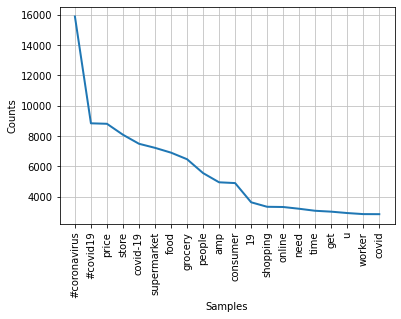

In [ ]:
fdistWithNoStop.plot(20)
plt.draw()
%matplotlib inline
plt.show(block=True)

In [ ]:
def Collocations(tokens):

    stopwords = nltk.corpus.stopwords.words("english")
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    Bigram = BigramCollocationFinder.from_words(tokens, window_size = 2)
    Bigram.apply_word_filter(lambda w: len(w) < 3 or w in stopwords)
    Bigram.apply_freq_filter(3)
    res = Bigram.nbest(bigram_measures.likelihood_ratio, 20)
    return res
Collocations(Lemma)

[('grocery', 'store'),
 ('toilet', 'paper'),
 ('hand', 'sanitizer'),
 ('panic', 'buying'),
 ('online', 'shopping'),
 ('social', 'distancing'),
 ('oil', 'price'),
 ('#coronavirus', '#covid19'),
 ('#covid19', '#coronavirus'),
 ('supply', 'chain'),
 ('stay', 'home'),
 ('food', 'bank'),
 ('covid-19', 'pandemic'),
 ('front', 'line'),
 ('stay', 'safe'),
 ('face', 'mask'),
 ('gas', 'price'),
 ('supermarket', 'shelf'),
 ('consumer', 'behavior'),
 ('wash', 'hand')]

In [ ]:
tweets=df['normlize_tweet'].apply(listtostring)
import re
haash=[]

for line in tweets:
    tag=re.search(r'#[0-9a-zA-Z0-9]+((_)?[0-9a-zA-Z0-9]+)*',line)
    if tag:
        tag=re.search(r'#[0-9a-zA-Z0-9]+((_)?[0-9a-zA-Z0-9]+)*',line).group()
        haash.append(tag)
HashTagF = [item for item in Counter(haash).most_common(10)]
print(HashTagF)

[('#coronavirus', 7728), ('#covid19', 3081), ('#covid2019', 838), ('#toiletpaper', 459), ('#socialdistancing', 368), ('#coronacrisis', 365), ('#covid', 275), ('#stayhomesavelives', 161), ('#supermarket', 113), ('#retail', 108)]


# Popular Locations

[('london', 575), ('united states', 532), ('london england', 527), ('washington dc', 498), ('new york ny', 400), ('united kingdom', 347), ('', 311), ('india', 300), ('los angeles ca', 287), ('usa', 269), ('uk', 265), ('australia', 237), ('canada', 210), ('england united kingdom', 194), ('global', 170), ('toronto ontario', 164), ('chicago il', 160), ('san francisco ca', 155), ('boston ma', 154), ('california usa', 154)]


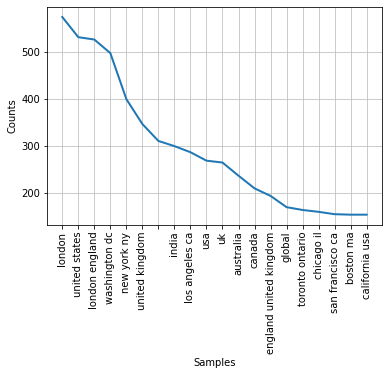

In [ ]:
loc = list(df['Location'])
all_loc = []
for item in loc:
    if type(item) == type(loc[1]):
        nitem = Text_Cleaning(item)

        all_loc.append(nitem)
freq_loc= []
for x in all_loc:
    freq_loc.append(x)
fdistWithStop=nltk.FreqDist(w for w in freq_loc)
print(fdistWithStop.most_common(20))
fdistWithStop.plot(20)
plt.draw()
%matplotlib inline
plt.show(block=True)

In [ ]:
!pip install 'nltk==3.4.5'

     |████████████████████████████████| 1.5MB 4.2MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=a275b785cb0d0b1a8507247c898289d7e3a03de70b90f3c3d0c5a6d8888d0829
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# nltk.download('punkt')


#Language Model

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
trump_corpus = list(tweets.apply(word_tokenize))

n = 3
train_data, padded_sents = padded_everygram_pipeline(n, trump_corpus)


In [ ]:
from nltk.lm import MLE
trump_model = MLE(n) # Lets train a 3-grams model, previously we set n=3
trump_model.fit(train_data, padded_sents)

In [ ]:
generate_sent(trump_model, num_words=50, random_seed=7)

'birdbox #staysafestayhome #lockdown #catsofthequarantine #cats #cat #coronavirus isle wight lot fish amp produce good supply chain stretched coronavirus pandemic #covid-19 pandemic'

# cleaning result

In [ ]:
def cleaning_result(_list):
  cleaning= []
  for string in _list:
    resutl=Text_Cleaning(string)
    re=toknize(resutl)
    re=lemmatize_text(re)
    re=listtostring(re)
    cleaning.append(re)
  return cleaning


In [ ]:
print(cleaning_result(["hello!!?" , "hi! I am using whatsapp."]))
print(cleaning_result(["HELLO)(%^@" , "hE plays football!!."]))

['hello', 'hi i am using whatsapp']
['hello', 'he play football']


In [ ]:

le=LabelEncoder()
df["Multi_Sentiment"]=df["Sentiment"]
df["Multi_Sentiment"]=le.fit_transform(df["Multi_Sentiment"])
# display(df["Multi_Sentiment"].head())
Multi_Sentiment=df["Multi_Sentiment"]
tweets=df.normlize_tweet.apply(listtostring)


df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet,Multi_Sentiment
0,3799,48751,London,16-03-2020,gahan and and,Neutral,[gahan],3
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbour, family, exchange, ph...",4
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworth, give, elde...",4
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug...",4
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,"[ready, go, supermarket, #covid19, outbreak, p...",0



قمت ببعض التعديلات حيث تم تحويل العامود الخاص بحالة التغريدة الى قيم باستخدام

LabelEncoder

 في حال تم التعديل على البنية او حذف السطر الحيادي.. قمت بتخزينه مع التغريدات بمتحولات كما هو موصح بالاسفل

In [ ]:
Multi_Sentiment.head()

0    3
1    4
2    4
3    4
4    0
Name: Multi_Sentiment, dtype: int64

In [ ]:
tweets.head()

0                                                gahan
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please panic enough food ...
4    ready go supermarket  outbreak paranoid food s...
Name: normlize_tweet, dtype: object



```
# This is formatted as c

```
# This is formatted as c

```
# This is formatted as code
```

ode
```

ode
```

وحدت شكل العامود بجعله

pos و neg

ومن ثم تحويله الى قيم كما فعلت سابقا

In [ ]:
df.drop(df.index[(df["Sentiment"] == "Neutral")],axis=0,inplace=True)
df['binray_Sentiment']=df.Sentiment.apply(binray_Sentiment)
df["binray_Sentiment"]=le.fit_transform(df["binray_Sentiment"])
binray_Sentiment=df['binray_Sentiment']
df['normlize_tweet']=df.normlize_tweet.apply(listtostring)
normlize_tweet=df['normlize_tweet']
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet,Multi_Sentiment,binray_Sentiment
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,4,1
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,coronavirus australia woolworth give elderly d...,4,1
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,4,1
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,ready go supermarket #covid19 outbreak paranoi...,0,0
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the region is first confirmed covid...,Positive,news region first confirmed covid-19 case came...,4,1


قمت بإنشاء بعض التوابع التي تساعدني في استخراج الفيتشرات وتصنيفها بدلا من كتابتها في كل مرة عند حدوث اي تعديل او تحديث على التغريدات

In [ ]:
def split(x,z): #من اجل فصل الداتا
    sentences = x.values
    y = z.values
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    return sentences_train, sentences_test, y_train, y_test


In [ ]:
def bow_features(X_train, X_test):#bow استخراج الفيتشرات باستخدام
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(X_train)
    X_test  = vectorizer.transform(X_test)
    return X_train, X_test

In [ ]:
def classifierbow(X_train,y_train,y_test,X_test):
    classifier = LogisticRegression()#LogisticRegression تصنيف الداتا وهنا استخدمت ال
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    return score

In [ ]:
def tfidf_features(X_train, X_test):#tf-idf استخراج الفيتشرات
    tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
    tfidf_vectorizer.fit(sentences_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_test

In [ ]:
def classifiertfidf(X_train,y_train,y_test,X_test):
    classifier = RidgeClassifier()#  RidgeClassifier استخدام المصنف
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    return score

# BOW ,TF-IDF and DNN for binray

In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet,binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)
bow1=classifier_bag
tf1=classifier_tfidf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.8729817007534983
Tfidf Accuracy: 0.852529601722282


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Flatten
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.convolutional import Conv1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import SpatialDropout1D
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.convolutional import Conv1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:

sentences_train, sentences_test, y_train, y_test=split(normlize_tweet,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


قمت بتجربة العديد من المودل الا ان المول الموضح في الاسفل اعطاني افضل نتيجة وهو

Blstm

وقمت بإضافة طبقة   

Conv1D

التي حسنت ايضا من الدقة وهي طبقة تستخرج الفيتشرات المميزة

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score1 = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score1))

Epoch 1/5
98/98 [==============================] - 24s 212ms/step - loss: 0.6832 - accuracy: 0.5475 - val_loss: 0.4994 - val_accuracy: 0.7826
Epoch 2/5
98/98 [==============================] - 20s 203ms/step - loss: 0.4335 - accuracy: 0.8306 - val_loss: 0.4191 - val_accuracy: 0.8198
Epoch 3/5
98/98 [==============================] - 20s 203ms/step - loss: 0.3083 - accuracy: 0.8901 - val_loss: 0.3770 - val_accuracy: 0.8417
Epoch 4/5
98/98 [==============================] - 20s 201ms/step - loss: 0.2444 - accuracy: 0.9175 - val_loss: 0.3666 - val_accuracy: 0.8530
Epoch 5/5
98/98 [==============================] - 20s 203ms/step - loss: 0.2057 - accuracy: 0.9345 - val_loss: 0.3770 - val_accuracy: 0.8550
score:0.9554
score:0.8550


In [ ]:
# plot_history(history)

# Binary without hashtags

In [ ]:
normlize_tweet1=normlize_tweet.apply(hashtags)


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet1,binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)
bow2=classifier_bag
tf2=classifier_tfidf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.873340509508432
Tfidf Accuracy: 0.8540844396603278


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet1,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score2 = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score2))

Epoch 1/5
98/98 [==============================] - 24s 212ms/step - loss: 0.6834 - accuracy: 0.5456 - val_loss: 0.5088 - val_accuracy: 0.7633
Epoch 2/5
98/98 [==============================] - 20s 204ms/step - loss: 0.4308 - accuracy: 0.8250 - val_loss: 0.4120 - val_accuracy: 0.8297
Epoch 3/5
98/98 [==============================] - 20s 205ms/step - loss: 0.2850 - accuracy: 0.8985 - val_loss: 0.3568 - val_accuracy: 0.8508
Epoch 4/5
98/98 [==============================] - 20s 205ms/step - loss: 0.2235 - accuracy: 0.9255 - val_loss: 0.3679 - val_accuracy: 0.8576
Epoch 5/5
98/98 [==============================] - 20s 204ms/step - loss: 0.1861 - accuracy: 0.9421 - val_loss: 0.3767 - val_accuracy: 0.8605
score:0.9565
score:0.8605


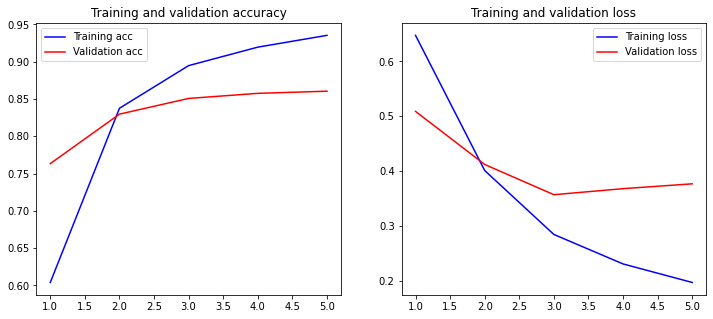

In [ ]:
plot_history(history)

# Binary without full hashtags

In [ ]:
normlize_tweet2=normlize_tweet.apply(full_hashtags)

In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet2,binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)
bow3=classifier_bag
tf3=classifier_tfidf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.8809950962803492
Tfidf Accuracy: 0.8610214089223777


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet2,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score3 = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score3))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 50)           1416250   
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 96, 32)            8032      
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 96, 40)            8480      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 48, 40)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 48, 1)             41        
Total params: 1,432,803
Trainable params: 1,432,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
98/98 [==============================] - 24s 211ms/step - loss: 0.6852 - accuracy: 0.5475 - val_los

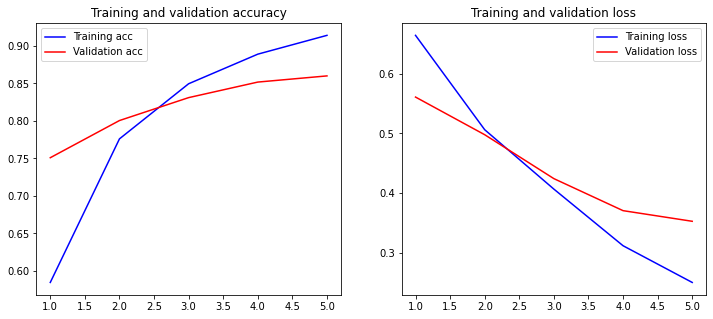

In [ ]:
plot_history(history)

# BOW,TF-IDF and DNN for Multiclass

قمت بإزالة الهاشتاغ مسبقا لأنه أدى الى تحسين الدقة مسبقا

In [ ]:
tweets=tweets.apply(full_hashtags)
tweets=tweets.apply(hashtags)
sentences_train, sentences_test, y_train, y_test=split(tweets,Multi_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)
bow4=classifier_bag
tf4=classifier_tfidf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.6341107871720116
Tfidf Accuracy: 0.5486880466472304


In [ ]:

sentences_train, sentences_test, y_train, y_test=split(tweets,Multi_Sentiment)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
model.save('my_model')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score4 = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score4))


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 50)           1562250   
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 100, 32)           4832      
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 100, 20)           3440      
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 105       
Total params: 1,570,627
Trainable params: 1,570,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
121/121 [==============================] - 23s 162ms/step - loss: 1.5617 - accuracy: 0.2869 - val_l

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


score:0.8264
score:0.7225


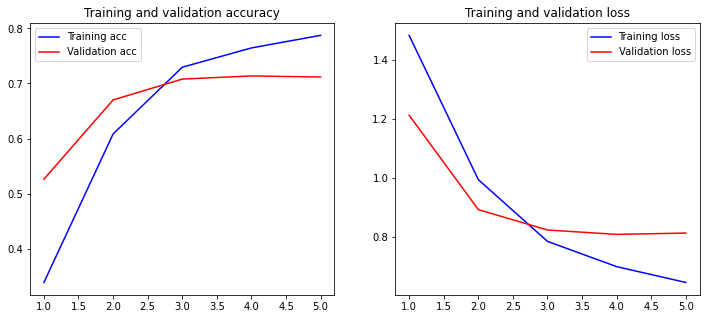

In [ ]:
plot_history(history)

In [ ]:
def testing_result(url):
  df = pd.read_csv(url,encoding='latin1')

  df['OriginalTweet']=df.OriginalTweet.apply(Text_Cleaning)
  df['normlize_tweet']=df.OriginalTweet.apply(toknize)
  df['normlize_tweet']=df.normlize_tweet.apply(lambda x: remove_stop(x))
  df['normlize_tweet']=df.normlize_tweet.apply(lambda x: lemmatize_text(x))



  le=LabelEncoder()
  df["Multi_Sentiment"]=df["Sentiment"]
  df["Multi_Sentiment"]=le.fit_transform(df["Multi_Sentiment"])

  Multi_Sentiment=df["Multi_Sentiment"]
  tweets=df.normlize_tweet.apply(listtostring)


  tweets=tweets.apply(full_hashtags)
  tweets=tweets.apply(hashtags)

  reconstructed_model = keras.models.load_model("my_model")
  with open('tokenizer.pickle', 'rb') as handle:
      tokenizer = pickle.load(handle)


  X_test = tokenizer.texts_to_sequences(tweets.values)
  Multi_Sentiment=Multi_Sentiment.values
  vocab_size = len(tokenizer.word_index) + 1
  embedding_dim = 50
  maxlen = 100

  X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
  loss,score = reconstructed_model.evaluate(X_test, Multi_Sentiment, verbose=True)

  print("score:{:.4f}".format(score))


In [ ]:
import keras
testing_result('https://raw.githubusercontent.com/ashraf97it/NLPHW2/main/Covid_19_tweets_train.csv')

1287/1287 [==============================] - 16s 12ms/step - loss: 0.6238 - accuracy: 0.8004
score:0.8004


In [ ]:
from prettytable import PrettyTable
myTable = PrettyTable(["model/ test", "binery", "without hashtag", "without full hashtag","multi class"])

# Add rows
myTable.add_row(["Back of word", "{:.4f}".format(bow1), "{:.4f}".format(bow2), "{:.4f}".format(bow3) , "{:.4f}".format(bow4)])
myTable.add_row(["Tf-idf", "{:.4f}".format(tf1), "{:.4f}".format(tf2),"{:.4f}".format(tf3),"{:.4f}".format(tf4)])
myTable.add_row(["bLSTM", "{:.4f}".format(score1), "{:.4f}".format(score2), "{:.4f}".format(score3),"{:.4f}".format(score4)])


print(myTable)

+--------------+--------+-----------------+----------------------+-------------+
| model/ test  | binery | without hashtag | without full hashtag | multi class |
+--------------+--------+-----------------+----------------------+-------------+
| Back of word | 0.8730 |      0.8733     |        0.8810        |    0.6341   |
|    Tf-idf    | 0.8525 |      0.8541     |        0.8610        |    0.5487   |
|    bLSTM     | 0.8550 |      0.8605     |        0.8514        |    0.7225   |
+--------------+--------+-----------------+----------------------+-------------+
